## Transformada de fourier, identificacion de picos maximos y generacion de dataset

In [1]:
import numpy as np
import pandas as pd
from variables import generate_up, plot_up
import math
import matplotlib.pyplot as plt

In [2]:
output = pd.read_csv("Matriz de valores de diametro.csv")

In [3]:
caso_0 = generate_up(np.array(output.iloc[53]))

In [4]:
Gamma = 2400 # Kg/m^3
E = 20000000000 # Modulo de elasticidad en Pa
Vp = math.sqrt(E/Gamma) # Velocidad de ondas de corte s^(-1)*m
Vs = 500 # Velocidad de propagación de las ondas de corte en el terreno(m/s)
L = 6 # Longitud del pilote (m)
k = 40*9.81*(100**3) #Rigidez a la fricción del suelo(N/m^3)
c = 0.01*9.81*(100**3) #Coeficiente de amortiguamiento del suelo (N*sec/m^3)
K = (50*E*math.pi*(0.4**2)*Vs)/(4*L*Vp) # Rigidez de la punta del pilote(N/m)
C = K*0.026*L/Vs # Coeficiente de amortiguamiento de la punta del pilote(N/(m*s^(-1)))


n_L = 100 # numero de segnmentos del pilote
c_sigma = math.sqrt(E/Gamma) # velocidad de onda de tension en m/s
Delta_x = L/n_L # longitud del segmento
Delta_t = Delta_x/c_sigma
n_p = 3*(L/c_sigma)*(1/Delta_t)

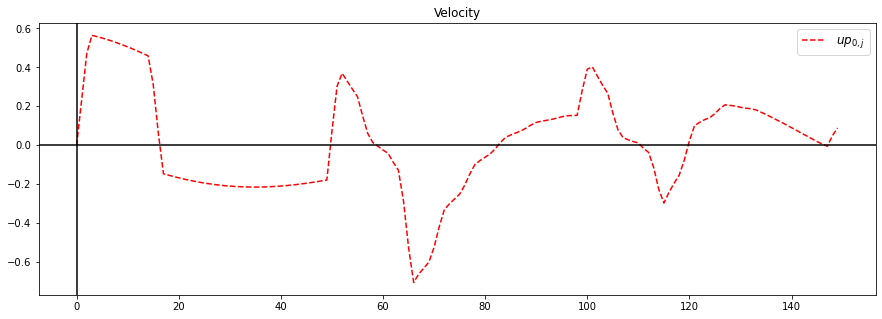

In [5]:
plot_up(caso_0)

### Transformada de Fourier

C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


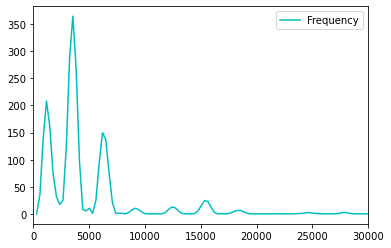

In [6]:
M = 10  # Potencia de elevacion
n = pow(2,M) # Numero de puntos
x = np.zeros(n)
x[0:301] = caso_0


fhat = np.fft.fft(x,n)                        
PSD = fhat * np.conj(fhat)                        
freq = ((2*math.pi)/(Delta_t*n))*np.arange(n)              
L = np.arange(1, np.floor(n/2), dtype='int')      


plt.plot(freq[L], PSD[L], color='c', LineWidth=1.5, label="Frequency")
plt.xlim(0, 30000)
plt.legend()

### Identificacion de picos maximos de frecuencia

C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


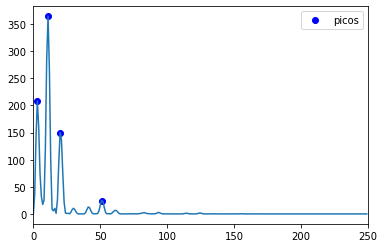

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks

x = PSD[L][:250]
peaks, _ = find_peaks(x, distance=20)
peaks2, _ = find_peaks(x, prominence=20)      
peaks3, _ = find_peaks(x, width=20)
peaks4, _ = find_peaks(x, threshold=0.4)    

plt.plot(peaks2, x[peaks2], "ob"); plt.plot(x); plt.legend(['picos'])
plt.xlim(0, 250)

plt.show()

In [8]:
input_1 = peaks2[1] - peaks2[0]
input_2 = float(PSD[L][peaks2[1]] - PSD[L][peaks2[0]])

C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  
